<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/sktime_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install microprediction
!pip install sktime

# Using sktime to create rolling predictions
First time I've used the library, so apologies if this isn't smooth. 

1) Data:

In [28]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='electricity-lbmp-nyiso-pjm.json')
YS[:3]


[41.56, 41.57, 41.81]

2) One off prediction using sktime

In [78]:
import numpy as np
import pandas as pd
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.base import ForecastingHorizon
import datetime 

In [79]:
y = pd.Series(index=pd.PeriodIndex(pd.date_range("2021-01", periods=len(YS), freq="H")), data=YS)
last_t = y.index[-1]
next_t = last_t.to_timestamp() + datetime.timedelta(hours=1)
forecaster = ThetaForecaster(sp=1)
forecaster.fit(y)
k = 3  
fh = np.arange(1,k)
fh = ForecastingHorizon(pd.PeriodIndex(pd.date_range(next_t, periods=k, freq="H")), is_relative=False
)
y_pred = forecaster.predict(fh)
y[-3:]

2021-01-23 11:00    45.68
2021-01-23 12:00    48.56
2021-01-23 13:00    45.83
Freq: H, dtype: float64

3) Rolling prediction using sktime

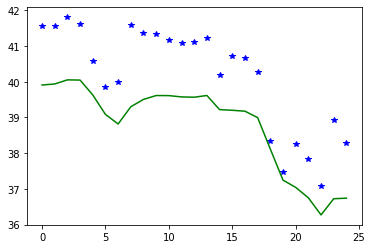

In [80]:
y_buffer = list()
xs = list()
for yst in YS[:50]:
  y_buffer.append(yst)
  yt = pd.Series(index=pd.PeriodIndex(pd.date_range("2021-01", periods=len(y_buffer), freq="H")), data=y_buffer)
  last_t = yt.index[-1]
  next_t = last_t.to_timestamp() + datetime.timedelta(hours=1)
  fh = ForecastingHorizon(pd.PeriodIndex(pd.date_range(next_t, periods=k, freq="H")), is_relative=False)
  x = forecaster.predict(fh)
  xs.append(x[0])
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(xs[:25],'g')

# Some alternative predictors

In [ ]:
# See https://www.sktime.org/en/latest/estimator_overview.html
- Arima
- AutoArima
- AutoETS
- BATS
- Croston
- ETc 